# Pika-Detector


In [28]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras import layers
import tensorflow as tf
import os

## Path du DataSet

In [29]:
# train_data_dir = 'train'  
# validation_data_dir = 'valid'
data_dir ='dataset'

In [30]:
# list = os.listdir(train_data_dir) # dir is your directory path
list = os.listdir(data_dir)
number_files = len(list)
print(number_files)

2


## Configuration des paramètres

In [31]:
img_height = 200
img_width = 200
num_classes = 2
epochs = 5
batch_size = 5

## Train Data & Validation Data

In [32]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names

print(class_names)

Found 174 files belonging to 2 classes.
Using 140 files for training.
Found 174 files belonging to 2 classes.
Using 34 files for validation.
['pikachu', 'rondoudou']


## Définition du réseau de neurone

In [33]:
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),#couche de rescaling 
    layers.Conv2D(128,4, activation='relu'),#On enchaine les couches de convolution pour détecter la présence d’un ensemble de features et de pooling (ici Maxpooling) pour réduire la dimension
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(), #couche de flatten pour transformer la matrice en un vecteur
    layers.Dense(64,activation='relu'),#couche d'activation 
    layers.Dense(num_classes, activation='softmax') #ici on utilise une activation softmax pour avoir la proba entre les différentes classes  
])

## Compilation du modèle

In [34]:
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), #
  metrics=['accuracy'],)

logdir="logs"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1, write_images=logdir,
                                                   embeddings_data=train_data)

model.fit( 
  train_data,
  validation_data=val_data,
  epochs=20,
  callbacks=[tensorboard_callback]
)

Epoch 1/20
28/28 [==============================] - 24s 847ms/step - loss: 0.7312 - accuracy: 0.5419 - val_loss: 0.3788 - val_accuracy: 0.9412
Epoch 2/20
28/28 [==============================] - 25s 901ms/step - loss: 0.4011 - accuracy: 0.9055 - val_loss: 0.4682 - val_accuracy: 0.7647
Epoch 3/20
28/28 [==============================] - 26s 919ms/step - loss: 0.4968 - accuracy: 0.6886 - val_loss: 0.3052 - val_accuracy: 0.8824
Epoch 4/20
28/28 [==============================] - 23s 820ms/step - loss: 0.1453 - accuracy: 0.9682 - val_loss: 0.5867 - val_accuracy: 0.9118
Epoch 5/20
28/28 [==============================] - 27s 960ms/step - loss: 0.1179 - accuracy: 0.9715 - val_loss: 0.3017 - val_accuracy: 0.9412
Epoch 6/20
28/28 [==============================] - 26s 936ms/step - loss: 0.1054 - accuracy: 0.9728 - val_loss: 0.2418 - val_accuracy: 0.9706
Epoch 7/20
28/28 [==============================] - 26s 921ms/step - loss: 0.1573 - accuracy: 0.9614 - val_loss: 0.3366 - val_accuracy: 0.9412

In [41]:
model.save("model_pokedex.h5")

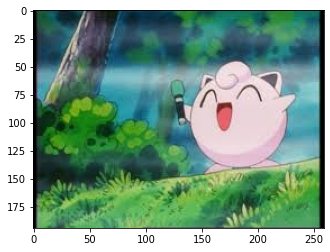

[0]
[[0.95132726 0.04867268]]
C'est un RONDOUDOU !


In [42]:

file_ = "img3.jpg"
image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
plt.show()
img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0) 
res = model.predict_classes(img_to_predict)
print(model.predict_classes(img_to_predict))
print(model.predict(img_to_predict))
if res == 1:
    print("C'est un PIKACHU !")
elif res == 0 :
    print("C'est un RONDOUDOU !")

